#### Import of Libraries

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pca import pca
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pycaret as pc

sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (7,5)

Data Tinkering Functions

In [118]:
#df=df.drop(columns=["at1"])
#df=df.head(900)
#df = df[df != "?"]
#df=df.dropna(axis=0, how="any")
#df=df.astype(float)
#df.to_csv('datasets/blocks/page-blocks-e.csv', index=False)
def valueChange(columnLabel):
    for j in columnLabel:
        y = df[j]
        clas = y.unique()
        for i in range(len(clas)):
            df[j]=df[j].replace(clas[i],i)
        

#### Dataset

In [119]:
df = pd.read_csv('datasets/winequality-red/winequality-red.csv')
#valueChange(["LargestSpotSize","SpotDistribution"])


In [120]:
df.head(5)

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,PH,Sulphates,Alcohol,Class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [121]:
df.info()
print("Number of duplicated rows is: ", df.duplicated().sum())
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   FixedAcidity        1599 non-null   float64
 1   VolatileAcidity     1599 non-null   float64
 2   CitricAcid          1599 non-null   float64
 3   ResidualSugar       1599 non-null   float64
 4   Chlorides           1599 non-null   float64
 5   FreeSulfurDioxide   1599 non-null   float64
 6   TotalSulfurDioxide  1599 non-null   float64
 7   Density             1599 non-null   float64
 8   PH                  1599 non-null   float64
 9   Sulphates           1599 non-null   float64
 10  Alcohol             1599 non-null   float64
 11  Class               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
Number of duplicated rows is:  240
Number of rows with NaNs is:  0


#### Exploratory Data Analysis

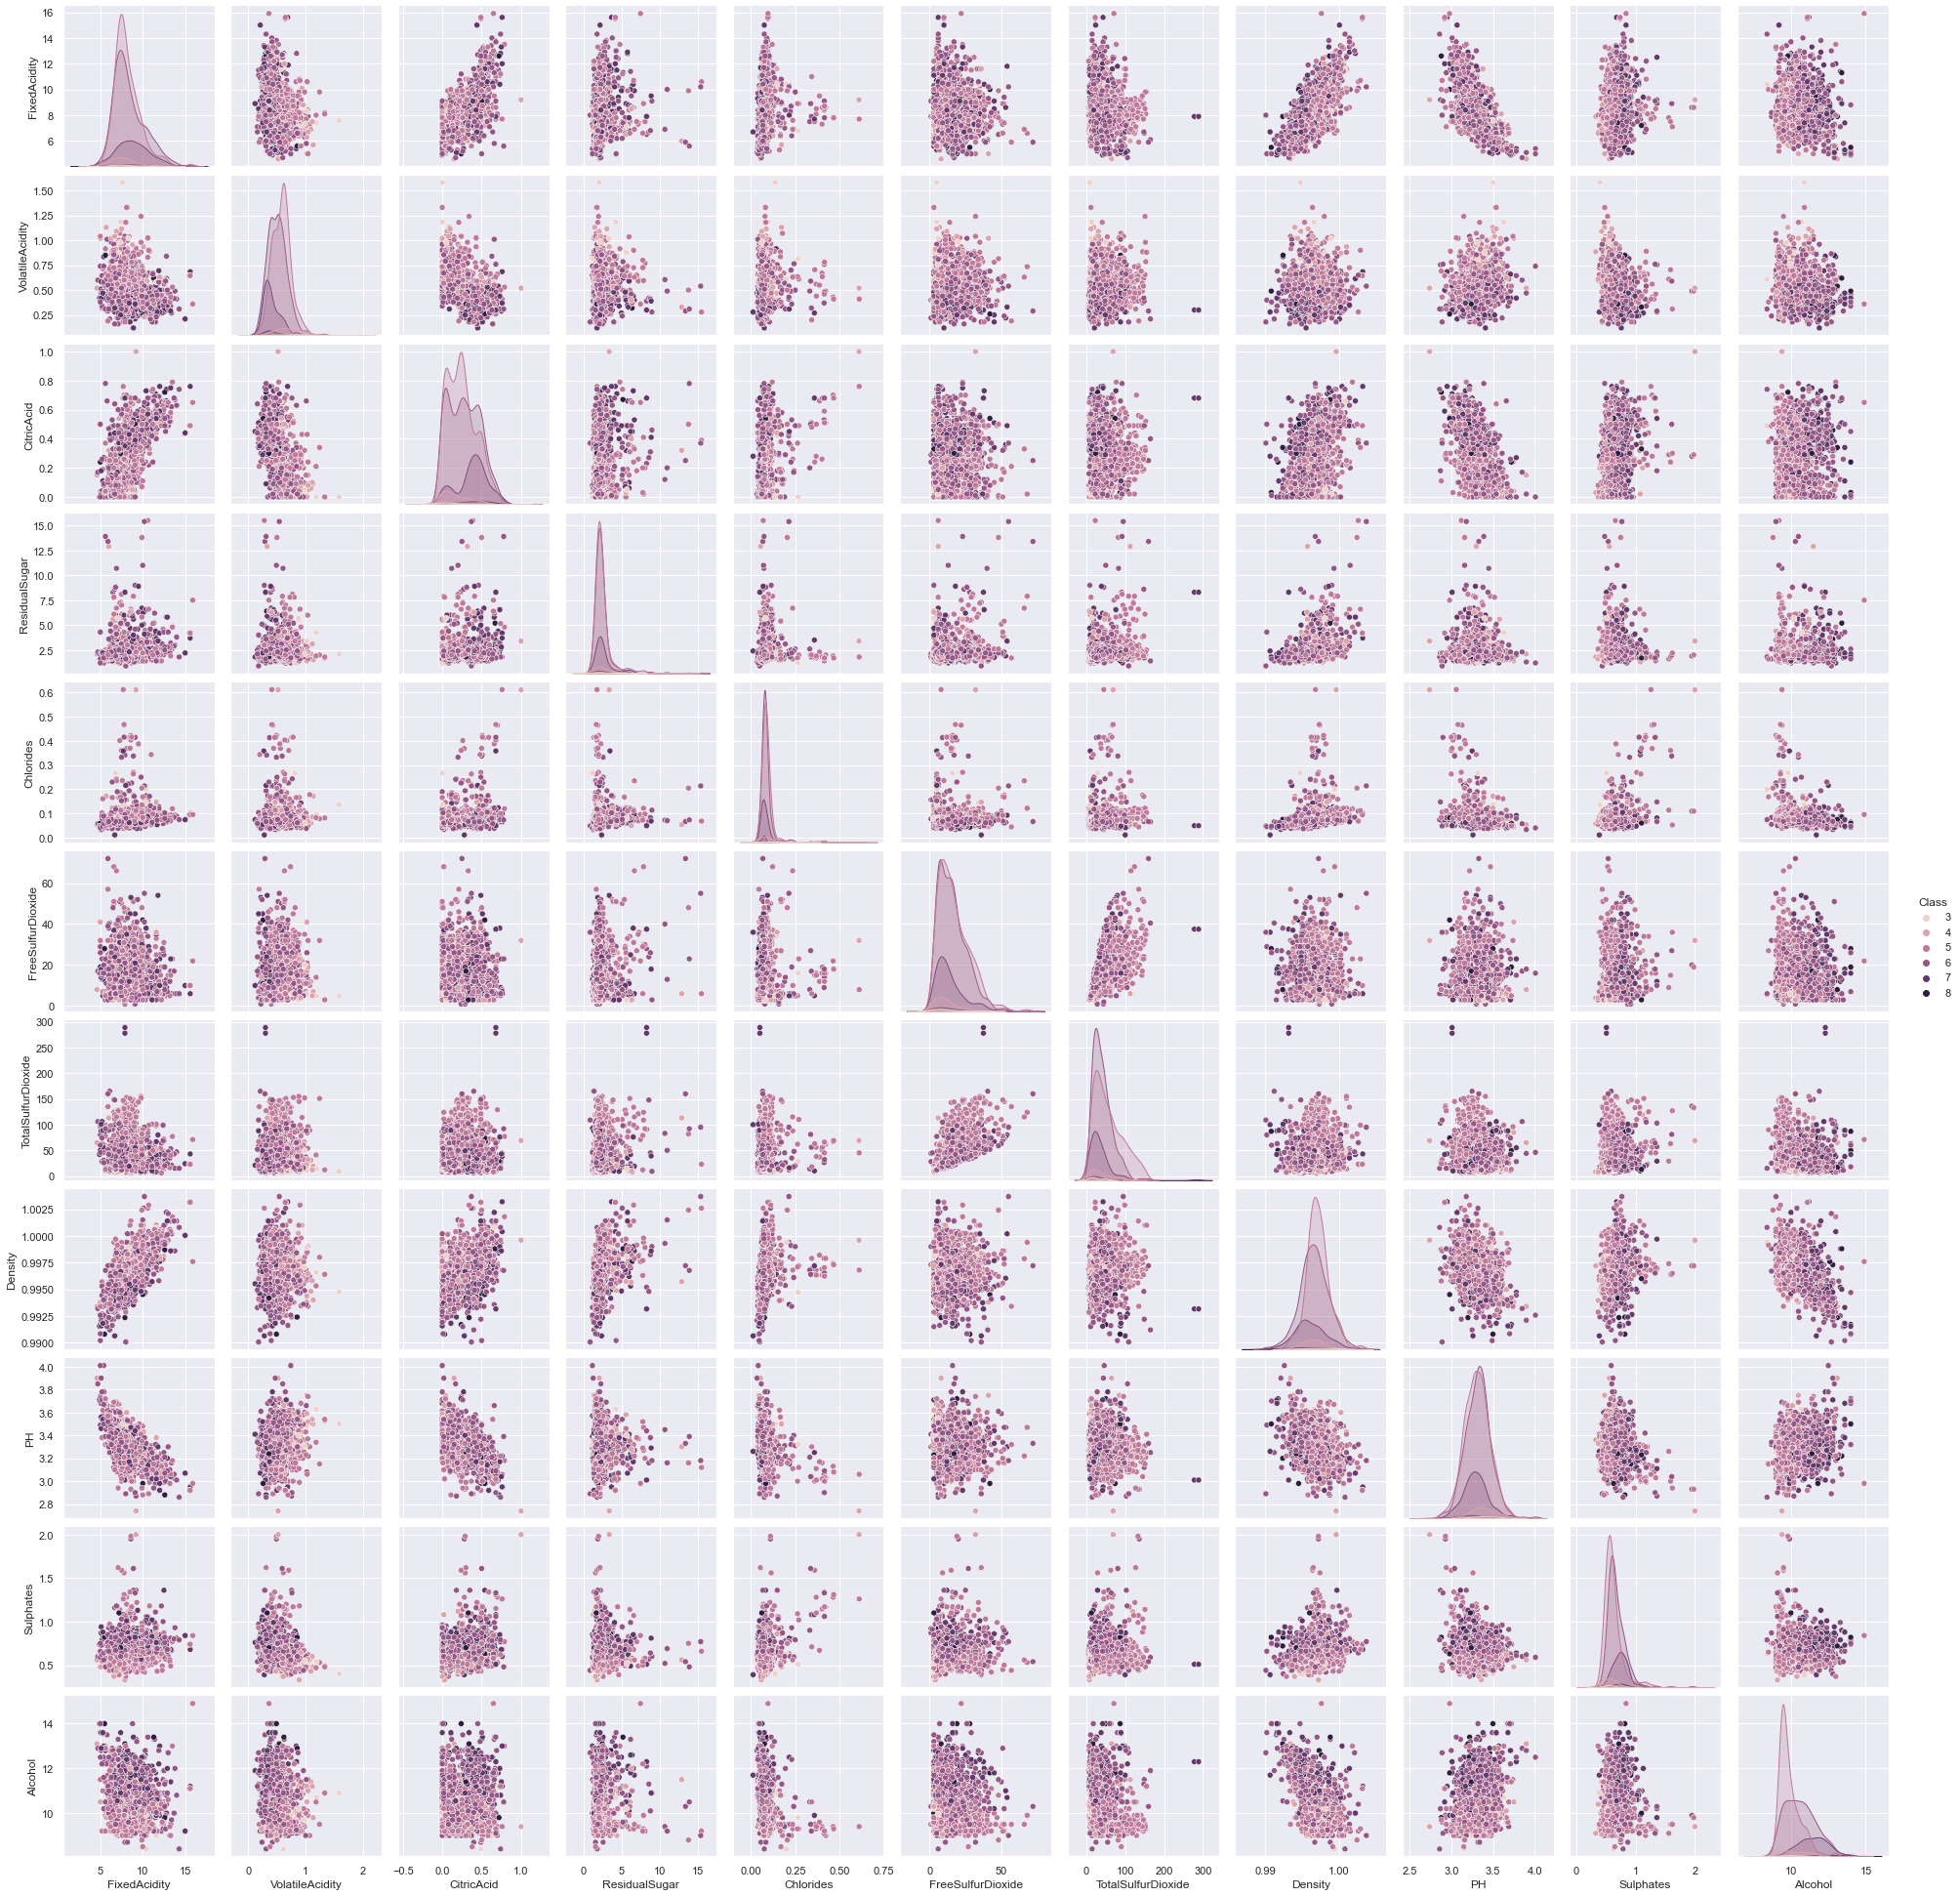

In [122]:
sns.pairplot(df, hue='Class')
plt.show()

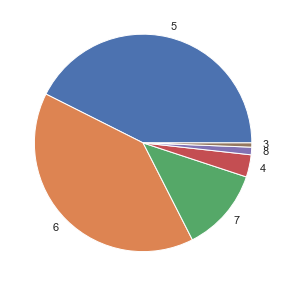

In [123]:
y =df['Class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

#### Data Matrix

In [124]:
X = df.drop(columns=['Class'])
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
FixedAcidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
VolatileAcidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
CitricAcid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
ResidualSugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
Chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
FreeSulfurDioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
TotalSulfurDioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
Density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
PH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
Sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


#### Standardize the Data

In [125]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
FixedAcidity,1599.0,3.554936e-16,1.000313,-2.137045,-0.700719,-0.241094,0.505795,4.355149
VolatileAcidity,1599.0,1.733031e-16,1.000313,-2.278280,-0.769931,-0.043689,0.626688,5.877976
CitricAcid,1599.0,-8.887339e-17,1.000313,-1.391472,-0.929318,-0.056360,0.765247,3.743574
ResidualSugar,1599.0,-1.244227e-16,1.000313,-1.162696,-0.453218,-0.240375,0.043416,9.195681
Chlorides,1599.0,3.732682e-16,1.000313,-1.603945,-0.371229,-0.179946,0.053845,11.127035
FreeSulfurDioxide,1599.0,-6.221137e-17,1.000313,-1.422500,-0.848716,-0.179300,0.490115,5.367284
TotalSulfurDioxide,1599.0,4.443669e-17,1.000313,-1.230584,-0.744040,-0.257497,0.472318,7.375154
Density,1599.0,-3.473172e-14,1.000313,-3.538731,-0.607756,0.001760,0.576825,3.680055
PH,1599.0,2.861723e-15,1.000313,-3.700401,-0.655141,-0.007213,0.575922,4.528282
Sulphates,1599.0,6.754377e-16,1.000313,-1.936507,-0.638220,-0.225128,0.424016,7.918677


#### Observations and Variables

In [126]:
observations = list(df.index)
variables = list(df.columns)

#### Box and Whisker Plots

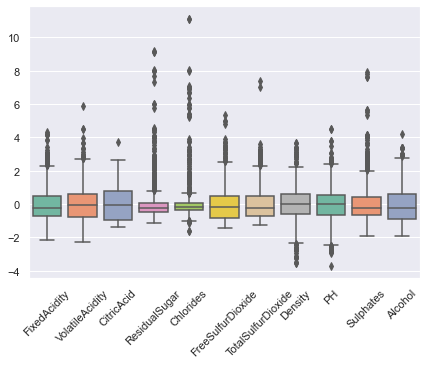

In [127]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

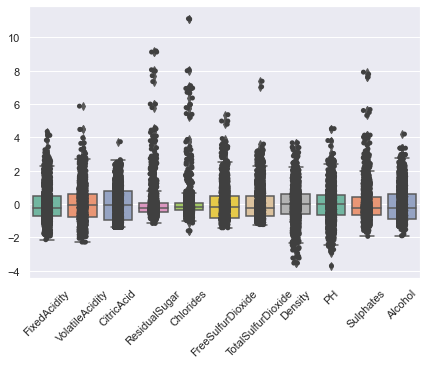

In [128]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

#### Correlation Matrix

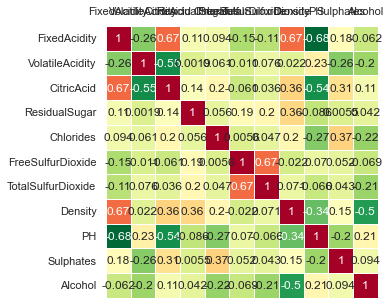

In [129]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#### PCA

In [130]:
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [11] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [9] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [11] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[9]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


PCs

In [131]:
out['PC']

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-1.619530,0.450950,-1.774454,0.043740,0.067014,-0.913921,-0.161043,-0.282258,0.005098
1,-0.799170,1.856553,-0.911690,0.548066,-0.018392,0.929714,-1.009829,0.762587,-0.520707
2,-0.748479,0.882039,-1.171394,0.411021,-0.043531,0.401473,-0.539553,0.597946,-0.086857
3,2.357673,-0.269976,0.243489,-0.928450,-1.499149,-0.131017,0.344290,-0.455375,0.091577
4,-1.619530,0.450950,-1.774454,0.043740,0.067014,-0.913921,-0.161043,-0.282258,0.005098
...,...,...,...,...,...,...,...,...,...
1594,-2.150500,0.814286,0.617063,0.407687,-0.240936,0.054835,0.170812,-0.355866,-0.971524
1595,-2.214496,0.893101,1.807402,0.414003,0.119592,-0.674711,-0.607970,-0.247640,-1.058135
1596,-1.456129,0.311746,1.124239,0.491877,0.193716,-0.506410,-0.231082,0.079382,-0.808773
1597,-2.270518,0.979791,0.627965,0.639770,0.067735,-0.860408,-0.321487,-0.468876,-0.612248


Scatter Plot

(<Figure size 1440x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'9 Principal Components explain [99.45%] of the variance'}, xlabel='PC1 (28.1% expl.var)', ylabel='PC2 (17.5% expl.var)'>)

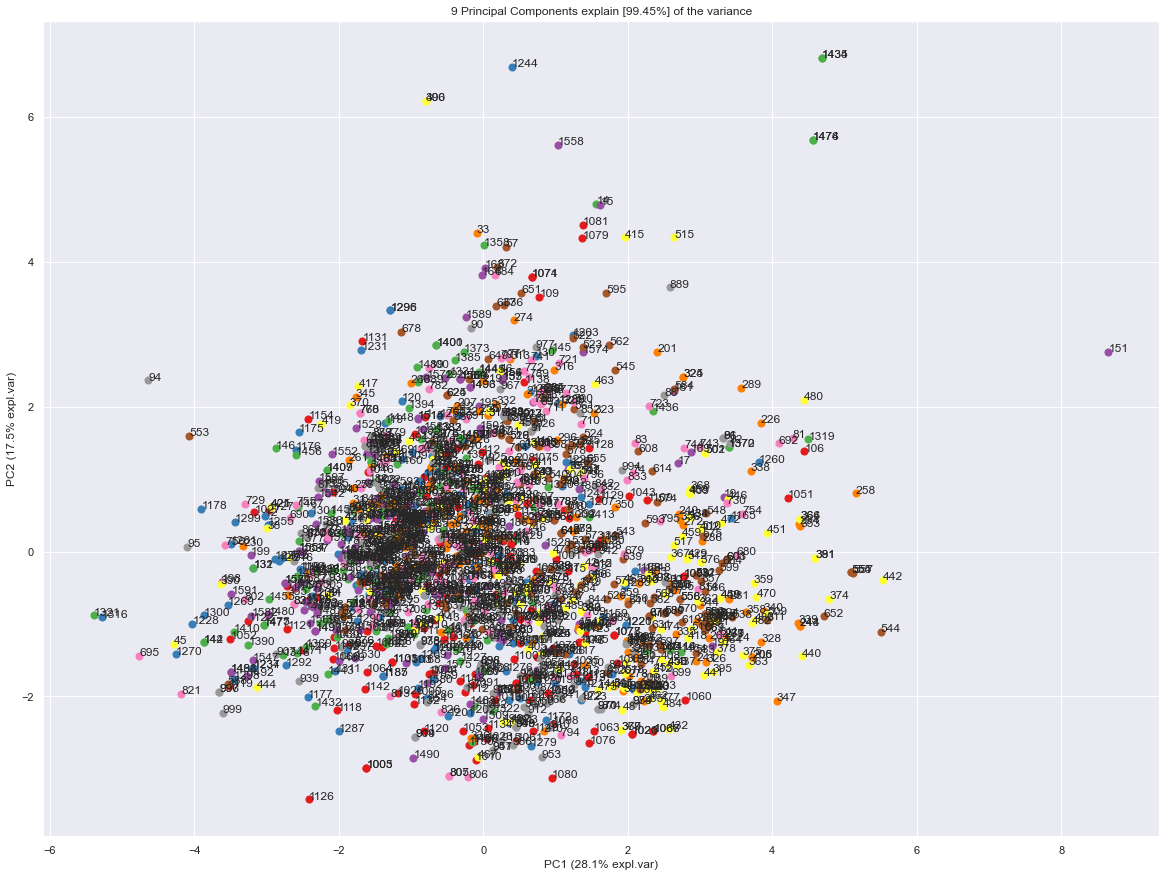

In [132]:
model.scatter(label=True, legend=False)

Eigenvectors

In [133]:
A = out['loadings'].T

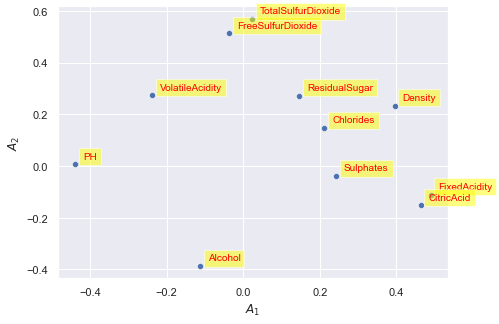

In [134]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

#### Scree Plot

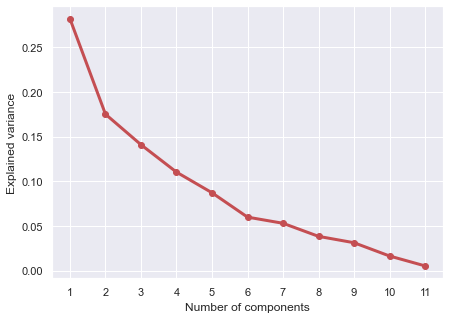

In [135]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

#### Explained Variance

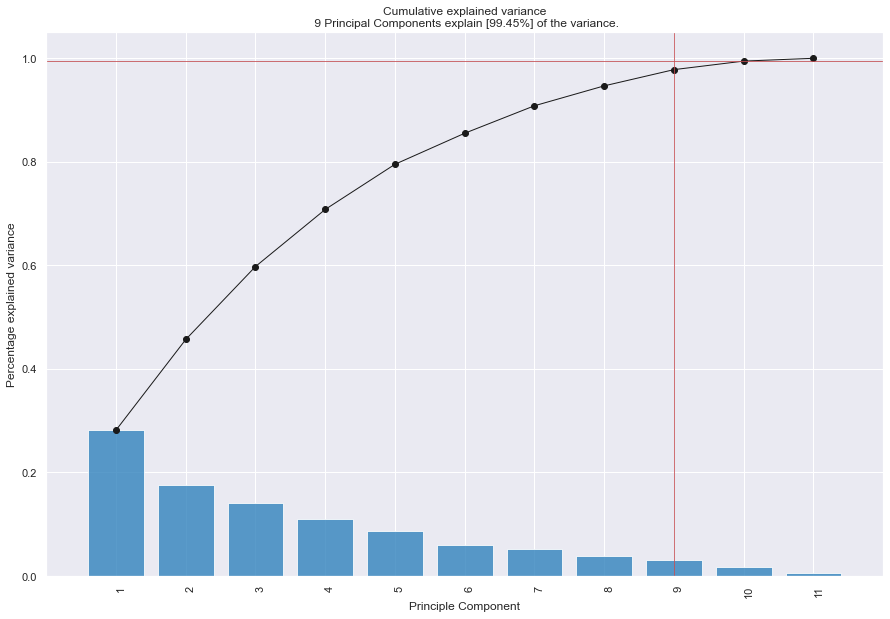

<Figure size 504x360 with 0 Axes>

In [136]:
model.plot();